In [110]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
import math
import lisacattools

In [152]:
alpha=0.25
Rb=0.8
Rd=2.5
Zd=0.4

R_Gal=15


#Galactic distribution
def P_pos(long, lat):
   
    P=[]
    
    for b in long:
        for l in lat:
            
            coord_gal=SkyCoord(l*u.rad, b*u.rad,frame="icrs")
            gc_icrs = coord_gal.transform_to('galactic')
            gc_l_rad,gc_b_rad=gc_icrs.l.radian,gc_icrs.b.radian
            coord_gal=SkyCoord(gc_l_rad*u.rad, gc_b_rad*u.rad,frame="galactic")
            coord_galc=coord_gal.cartesian
            xgc,ygc,zgc=pd.Series(np.array([(coord_galc.x),(coord_galc.y),(coord_galc.z)]))
            c = SkyCoord(x=xgc, y=ygc, z=zgc, representation_type='cartesian')
            x,y,z=pd.Series(np.array([(c.x),(c.y),(c.z)]))
            
            x=x-8
            
            r_sq=x**2+y**2+z**2
            u_sq=x**2+y**2

            P.append((alpha*np.exp(-r_sq/Rb**2)+(1-alpha)*np.exp(-np.sqrt(u_sq)/Rd)*(1/np.cosh((z/Zd)))**2))      
    
    P_f=[]
    P_norm=[]
    P_tot = []
   
    for i in range(len(P)):
        P_norm.append((P[i]-np.amin(P))/(np.amax(P)-np.amin(P)))
        P_f.append((1-0.1)*P_norm[i]+0.1)

    for i in range(N):
        P_tot.append([])

    for i in range(N):
        P_tot[i]=P_f[0+N*i:(i+1)*N]
        
    return P_tot
    


In [157]:
alpha=0.25
Rb=0.8
Rd=2.5
Zd=0.4


#Ecliptic distribution
import astropy.coordinates as coord

R_Gal=15
Dist_Sun=7.2
def P_pos_bis(long, lat):
   
    P=[]
    
    
    for b in long:
        for l in lat:
            
            #c=SkyCoord(l*u.rad, b*u.rad,frame="icrs")
            #c_gal=c.transform_to(coord.Galactocentric(galcen_distance=8*u.kpc))
            #c_gal_set=coord.SkyCoord(c_gal.x,c_gal.y,c_gal.z,frame=coord.Galactocentric)
            #c_ecl=c_gal_set.transform_to("barycentricmeanecliptic")
            #c_eclp_cart=c_ecl.cartesian
            #xec,yec,zec=c_eclp_cart.x.value,c_eclp_cart.y.value,c_eclp_cart.z.value
            
            #c=SkyCoord(l*u.rad, b*u.rad,frame="icrs")
            #c_ecl=c.transform_to("barycentricmeanecliptic")
            c_ecl_set=SkyCoord(l*u.rad, b*u.rad,distance=R_Gal*u.kpc,frame="barycentricmeanecliptic")
            #c_ecl_set=SkyCoord(lon=c_ecl.lon.radian*u.rad,lat=c_ecl.lat.radian*u.rad,distance=15*u.kpc,frame="barycentricmeanecliptic")
            c_gal=c_ecl_set.transform_to(coord.Galactocentric(galcen_distance=8*u.kpc))
            c_gal_cart=c_gal.cartesian
            xec,yec,zec=c_gal_cart.x.value,c_gal_cart.y.value,c_gal_cart.z.value
            
            
            r_sq=xec**2+yec**2+zec**2
            u_sq=xec**2+yec**2
    
            P.append((alpha*np.exp(-r_sq/Rb**2)+(1-alpha)*np.exp(-np.sqrt(u_sq)/Rd)*(1/np.cosh((zec/Zd))**2)))       
    
    P_f=[]
    P_norm=[]
    P_tot = []
   
    for i in range(len(P)):
        P_norm.append((P[i]-np.amin(P))/(np.amax(P)-np.amin(P)))
        P_f.append((1-0.1)*P_norm[i]+0.1)

    for i in range(N):
        P_tot.append([])

    for i in range(N):
        P_tot[i]=P_f[0+N*i:(i+1)*N]
        
    return P_tot

In [64]:
c=SkyCoord(-np.pi*u.rad, -np.pi/2*u.rad,frame="icrs",distance=15*u.kpc)
c_gal=c.transform_to(coord.Galactocentric(galcen_distance=8*u.kpc))
c_gal_set=coord.SkyCoord(c_gal.x,c_gal.y,c_gal.z,frame=coord.Galactocentric)
c_ecl=c_gal_set.transform_to("barycentricmeanecliptic")
c_eclp_cart=c_ecl.cartesian
xec,yec,zec=c_eclp_cart.x.value,c_eclp_cart.y.value,c_eclp_cart.z.value

print(c_gal_set)
print(xec)


<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (-0.7602554, -11.20472946, -6.83780972)>
-0.006706334419686603


In [4]:
print(np.shape(P_pos(tab_l,tab_b)))

NameError: name 'tab_l' is not defined

In [142]:
N=100
tab_l_deg=np.linspace(-180,180,N)
tab_b_deg=np.linspace(-90,90,N)

tab_l_rad=np.linspace(-np.pi,np.pi,N)
tab_b_rad=np.linspace(-np.pi/2,np.pi/2,N)

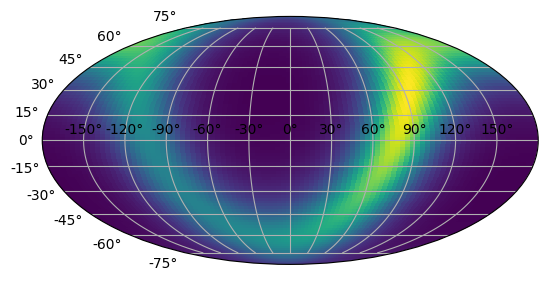

In [155]:
l, b = np.meshgrid(np.radians(tab_l_deg),np.radians(tab_b_deg))

plt.figure()
ax = plt.subplot(111, projection='mollweide')
plt.pcolormesh(l, b, np.rot90(np.rot90(P_pos(tab_b_rad,tab_l_rad))))

plt.grid()
plt.show()

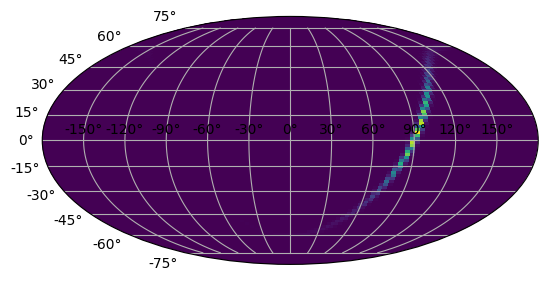

In [158]:
l, b = np.meshgrid(np.radians(tab_l_deg), np.radians(tab_b_deg))

plt.figure()
ax = plt.subplot(111, projection='mollweide')
plt.pcolormesh(l, b, (np.rot90(np.rot90(P_pos_bis(tab_b_rad,tab_l_rad)))))


plt.grid()
plt.show()